In [1]:
# we will find the best weight file for the model

In [18]:
import numpy as np
import fastcore.all as fc
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline


In [7]:
x = fc.L(fc.Path("../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints").glob("*.ckpt"))
x.sort()
x




(#100) [Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=100-step=107565-val_ep_loss=1.208-train_ep_loss=1.285-val_ep_sync_loss=0.216-train_ep_sync_loss=0.191.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=101-step=108630-val_ep_loss=1.208-train_ep_loss=1.244-val_ep_sync_loss=0.225-train_ep_sync_loss=0.227.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=102-step=109695-val_ep_loss=1.197-train_ep_loss=1.273-val_ep_sync_loss=0.223-train_ep_sync_loss=0.213.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=103-step=110760-val_ep_loss=1.187-train_ep_loss=1.259-val_ep_sync_loss=0.218-train_ep_sync_loss=0.201.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=105-step=112890-val_ep_loss=1.218-train_ep_loss=1.326-val_ep_sync_loss=0.216-train_ep_sync_loss=0.237.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=107-step=

In [17]:
# get epoch number from the file name
ep = fc.L([int(i.name.split("-")[0].rsplit("=", 1)[1]) for i in x])
ep




(#100) [100,101,102,103,105,107,110,111,112,113...]

In [22]:
fx = x[np.argsort(ep)]
fx


(#100) [Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=61-step=66030-val_ep_loss=1.222-train_ep_loss=1.344-val_ep_sync_loss=0.280-train_ep_sync_loss=0.270.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=67-step=72420-val_ep_loss=1.222-train_ep_loss=1.314-val_ep_sync_loss=0.234-train_ep_sync_loss=0.248.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=77-step=83070-val_ep_loss=1.214-train_ep_loss=1.301-val_ep_sync_loss=0.215-train_ep_sync_loss=0.201.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=78-step=84135-val_ep_loss=1.208-train_ep_loss=1.296-val_ep_sync_loss=0.217-train_ep_sync_loss=0.196.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=83-step=89460-val_ep_loss=1.209-train_ep_loss=1.266-val_ep_sync_loss=0.221-train_ep_sync_loss=0.210.ckpt'),Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=84-step=90525-val_e

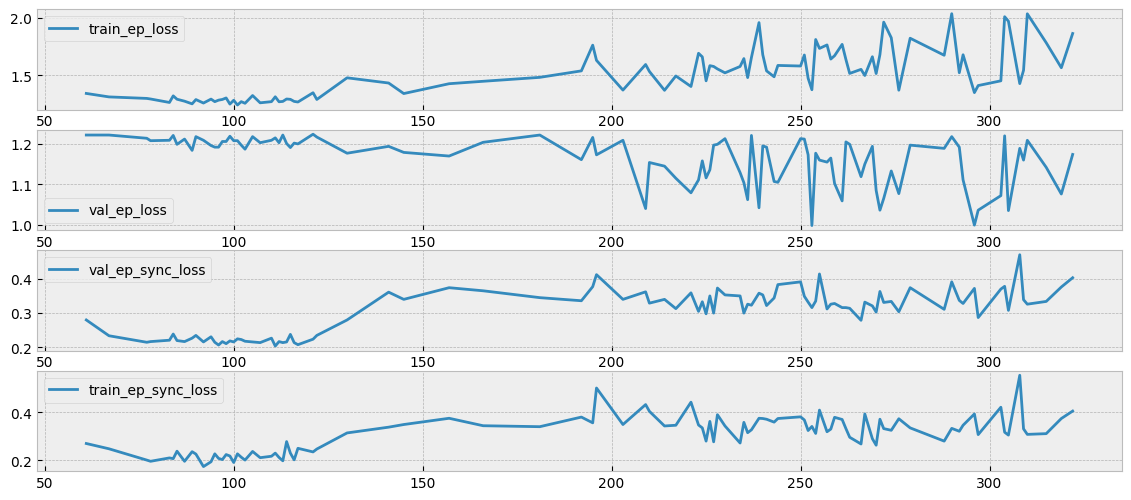

In [35]:
_ep = []
tel = []
vel = []
vesl = []
tesl = []

for i in fx:
    epoch = int(i.name.split("-")[0].rsplit("=", 1)[1])
    val_ep_loss = float(i.name.split("-")[2].rsplit("=", 1)[1])
    train_ep_loss = float(i.name.split("-")[3].rsplit("=", 1)[1])
    val_ep_sync_loss = float(i.name.split("-")[4].rsplit("=", 1)[1])
    train_ep_sync_loss = float(i.name.split("-")[5].rsplit("=", 1)[1].rsplit(".", 1)[0])
    _ep.append(epoch)
    tel.append(train_ep_loss)
    vel.append(val_ep_loss)
    vesl.append(val_ep_sync_loss)
    tesl.append(train_ep_sync_loss)

fig, ax = plt.subplots(figsize=(14, 6), nrows=4)
ax.flat[0].plot(_ep, tel, label="train_ep_loss")
ax.flat[1].plot(_ep, vel, label="val_ep_loss")
ax.flat[2].plot(_ep, vesl, label="val_ep_sync_loss")
ax.flat[3].plot(_ep, tesl, label="train_ep_sync_loss")
ax.flat[0].legend()
ax.flat[1].legend()
ax.flat[2].legend()
ax.flat[3].legend()


In [31]:
val_ep_loss = fx[np.argmin(vel)]
val_ep_loss

Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=253-step=270510-val_ep_loss=0.998-train_ep_loss=1.376-val_ep_sync_loss=0.316-train_ep_sync_loss=0.341.ckpt')

In [30]:
fx[np.argmin(vesl)]

Path('../lightning_logs/lipsync_v2_l1_iv_clip/c7vy23fv/checkpoints/epoch=111-step=119280-val_ep_loss=1.215-train_ep_loss=1.315-val_ep_sync_loss=0.204-train_ep_sync_loss=0.230.ckpt')